# Investigation of Cusp Irregularities sounding rockets

Measurements using the m-NLP instrument has been preformed on the ICI-2 sounding rocket launched from Svaldbard in 2008. You will work on the collected m-NLP data from this rocket and plot the measure electron density as a function of time.

## High-latitude F-region
- Increase in electron density give rise to great disturbances in radio-wave propagation conditions (reflection, absorption, and scatter) – impact GNSS
- These disturbances are small-scale irregularities in the ionosphere (< km targets)
- Resolution of current state of the art HF raders are usualy too poor to study fluctuations at decameter scale.



Research about small-scale irregularities in the high-latitude F-region has historically not progressed as fast as in equatorial regions. A probable reason is the geometrical impossibility for high-latitude ground based rader to obtain an appropriate backscatter angle at F-region using VHF and UHF systems. While F-region ground-based radar are possible at HF frequencies, their resolution is usually too poor to investigate the electron density fluctuations at decameter scales.  

Therefore, [Moen et al. 2002](https://doi.org/10.1029/2001JA000111) pointed out an ultimate need for high-resolution in-situ measurements in order to be able to characterize these small-scale irregulariteis. This gave birth to the sounding rocket program Investigation of Cups Irregularties (ICI) by the University of Oslo. To day, the following rockets have been launched:
- ICI-1 (2003)
- ICI-2 (2008)
- ICI-3 (2011)
- ICI-4 (2015)
- ICI-5 (2019)
- ICI-5-bis: Planned 2024/2025

Source: Andres Spicher, Spectral Analysis of electron density fluctuations by the ICI-2 sounding rocket, Master's thesis, University of Oslo, Mai 2013. http://urn.nb.no/URN:NBN:no-38642



# Case study ICI-2


Measurements using the m-NLP instrument has been preformed on the ICI-2 sounding rocket launched from Ny-Ålesund, Svaldbard (78.9° N, 11.9° E geographic coordinates) at 1035 Universal Time (UT) on the 5th of December 2008.


This notebooks demonstrate how to get from raw data to the electron density.

## Method

The applied method is described in [Bekkeng 2010] and [Jacobsen 2010].

K. S. Jacobsen et al., "A new Langmuir probe concept for rapid sampling of space plasma electron density", Measurement Science and Technology, Volume 21, No. 8.
http://iopscience.iop.org/article/10.1088/0957-0233/21/8/085902/meta

T. A. Bekkeng et al., "Design of a multi-needle Langmuir probe system", Measurements Science and Technology, Volume 21, No. 8
http://iopscience.iop.org/article/10.1088/0957-0233/21/8/085903/meta




### Analysis steps

1. Prepare and plot the raw data (4 curves)
2. Find the relevant spin components
3. Filter out the spins components and plot the filtered currents
4. Calculate the electron density and plot the density curve


#### Electron density

$N_e = \sqrt{K\frac{\Delta I^2}{\Delta V}}$

$K=\frac{m_e}{2q(q2rl)^2}$




## m-NLP configuraiton

The m-NLP instrument flew four probes biased at 2.5 V, 4 V, 5.5 V, and 10 V.

The 16-bit ADC sampling rate was 5787 Hz, and the resistor value in the current to voltage converter was 4.7 M$\Omega$. The dynamic range of the ADC is +10 V to -10 V, or 20 V.

The data file contains 5 columns:
- ADC sample number
- ADC count value for probe 1
- ADC count value for probe 2
- ADC count value for probe 3
- ADC count value for probe 4




In [ ]:
# Import all relevant libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
import scipy.constants as sc


# Support functions

In [ ]:
#Functions

# Function to filter out a frequency band
# data: Array of data
# lowcut: Lowest frequency in the bandstop filter
# highcut: higest frequency in the bandstop filter
# fs: Sample frequency of data, we use 5787
# order: order of filter, we use a second order filter
def butter_bandstop_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    i, u = signal.butter(order, [low, high], btype='bandstop')
    y = signal.lfilter(i, u, data)
    return y


# function to convert raw ADC values to current
# ADC is 2^16 = 65536 bits
# ADC dynamic range is 20 V (+-10 V), midrange at ~ 2^16 / 2
# LSB resolution:  20V / (2^16 * 4.7e6) => 6.49e-11 A
# V = IR  => I = V/R


def calc_current(x):
    midpoint = 2**15
    return (x-midpoint)*adc_dynamic_range/(adc_bits*resistor)

def calc_Ne(coef_a):
    res = np.sqrt(coef_a* ( sc.m_e/(2*sc.e*(sc.e*2*rp*lp)**2)))
    return res



In [ ]:
# Raw data
#fData = "../data/ici2_mnlp_raw.txt"
fData = "/content/SS-520-3_raw_data.csv"

In [ ]:
# constants

# probe dimensions
rp=0.51e-3;
lp=2.5e-2;
Ae=2*math.pi*rp*lp;

# Voltages
# 2.5, 4, 5.5, 10
Vbias = [3, 4.5, 6, 7.5]

# sampling rate
sampling_rate = 3200;

# adc to current convertion constants
adc_bits = math.pow(2,16)
resistor = 4.7e6
adc_dynamic_range = 20 # +-10V

# 1. Prepare and plot the raw data

- Read the raw data in to a Pandas dataframe
- Convert column with time information to seconds by dividing by the sampling rate.
- Add four new columns converting the raw adc counts to currents.
- Plot the 4 currents as a function of time. (Plot only from 100 to 400 seconds)


In [ ]:
# 1. Add your solution

In [ ]:
#. Prepare and plot the raw data - solution


#Read raw data into Pandas DataFrame and add column header names
df_mnlp= pd.read_csv(fData,sep=",",header=None,names = ["i1","i2", "i3", "i4", "Frame Data"]);

# Convert time to seconds
# Column one is sample counter, dividing by sample_rate gives time in seconds
df_mnlp["time"] =df_mnlp["Frame Data"] /sampling_rate
df_mnlp["time"] -= 866.1225


# Convert probe columns to current
#df_mnlp[['i1','i2','i3','i4']] = df_mnlp[['adc1','adc2','adc3','adc4']].apply(calc_current);





In [ ]:
df_mnlp.head()

,i1,i2,i3,i4,Frame Data,time
0,14.984170,38.022814,75.119179,103.963613,3063491.0,91.218438
1,14.742490,37.529011,74.396880,101.797704,3063492.0,91.218750
2,14.500810,34.566194,72.952280,99.872452,3063493.0,91.219063
3,14.259129,26.171547,71.507680,97.465887,3063494.0,91.219375
4,13.534089,31.356476,68.859248,93.374726,3063495.0,91.219688


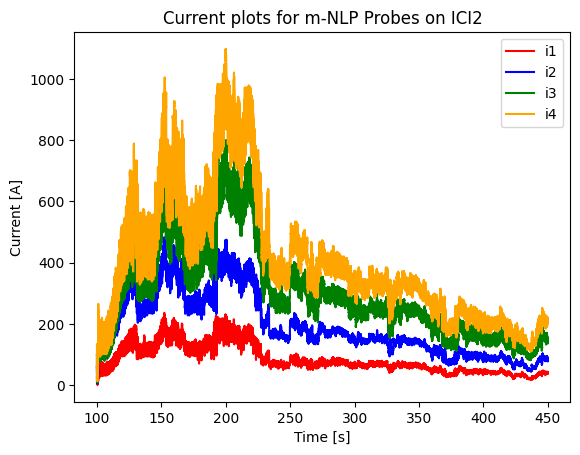

In [ ]:
# Plot all raw data
#print(min(df_mnlp["time"]))

# Reduce data to a subset for faster processing
t_low = 100
t_high = 450

#Returns a table with false or true for each row according to if condition is met or not.
idx_filter = ( df_mnlp['time'] >= t_low) & ( df_mnlp['time'] < t_high)

colors =['red','blue','green','orange']
y_columns = ['i1','i2','i3','i4']
ax = df_mnlp[idx_filter].plot(x='time', y=y_columns,kind='line',color=colors)#,linestyle=[':','--','-.','-'])
ax.set_xlabel("Time [s]");
ax.set_ylabel("Current [A]");
ax.set_title("Current plots for m-NLP Probes on ICI2");

# We see the the data cleary contains a lot of noise.

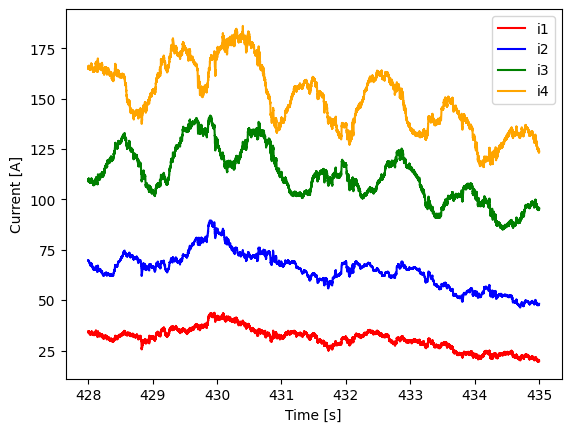

In [ ]:
# Zooming in we can identify a regular oscillation in the data. This is due to the spin of the rocket.
t_low = 428
t_high = 435

#Returns a table with false or true for each row according to if condition is met or not.
time_filter = ( df_mnlp['time'] >= t_low) & ( df_mnlp['time'] < t_high)

#df_mnlp_subset = df_mnlp[time_filter]

ax = df_mnlp[time_filter].plot(x='time', y=y_columns,kind='line',color=colors)#,linestyle=[':','--','-.','-'])
ax.set_xlabel("Time [s]");
ax.set_ylabel("Current [A]");



# 2. Find the relevant spin components
- Use the numpy FFT function to perform a frequency analysis on probe 4

(0.0, 10.0)

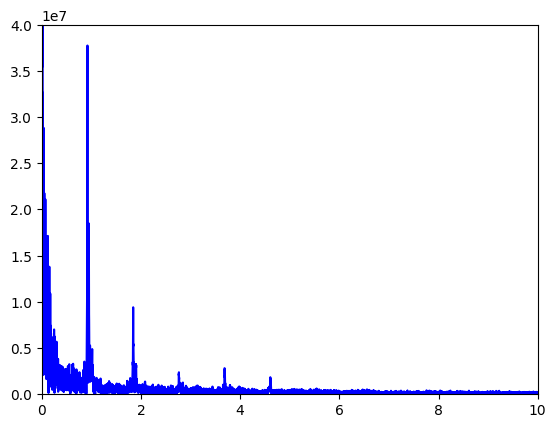

In [ ]:
# Add your solution here:
data = np.fft.fft(df_mnlp["i4"].dropna().to_numpy())
freq = np.fft.fftfreq(len(data), 1/sampling_rate)
on_real = len(freq)//2

plt.plot(freq[:on_real], np.abs(data[:on_real]),color = "b")
plt.ylim((0,4e+7))
plt.xlim((0,10))

The following peaks are found:
[ 9.99968751e-01  4.09987188e+00  7.19977501e+00  1.00496859e+01
  1.32495860e+01  1.65494828e+01  2.00493735e+01  2.33492703e+01
  2.82991157e+01  3.10490297e+01  3.35489516e+01  3.61488703e+01
  3.93987688e+01  4.21986813e+01  4.58485672e+01  5.00984344e+01
  5.29483454e+01  5.55982626e+01  5.81481829e+01  6.08980969e+01
  6.45479829e+01  6.90978407e+01  7.17977563e+01  7.50476548e+01
  7.77475704e+01  8.05474829e+01  8.46973532e+01  8.76972595e+01
  9.01971813e+01  9.33470829e+01  9.68469735e+01  9.99468767e+01
  1.02796788e+02  1.06146683e+02  1.10896534e+02  1.14596419e+02
  1.17546327e+02  1.20196244e+02  1.23946127e+02  1.28845974e+02
  1.32445861e+02  1.35395769e+02  1.37945689e+02  1.42695541e+02
  1.45495453e+02  1.48195369e+02  1.51445267e+02  1.54995156e+02
  1.59745008e+02  1.62694916e+02  1.65194838e+02  1.69744695e+02
  1.74044561e+02  1.78544420e+02  1.83444267e+02  1.86494172e+02
  1.91294022e+02  1.94143933e+02  1.97593825e+02  2.0049373

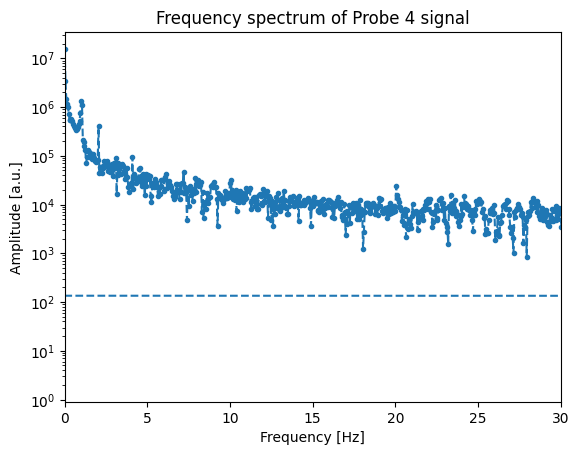

In [ ]:
# Find spin frequency and harmonics
# Use the numpy FFT function to perform a frequency analysis on probe 4

# Create idx filter for a short time period
idx_filter = ( df_mnlp['time'] >= 100) & ( df_mnlp['time'] < 120)

# Extract data from probe 4
data = df_mnlp[idx_filter].i4

# Generate fft
fft = np.fft.fft(data)

# Return amplitude spectrum
fft_abs = np.abs(fft)

# return an array giving the frequencies of corresponding elements in the output
freqs = np.fft.fftfreq(len(data))*sampling_rate

#Plot
fig, ax = plt.subplots()
ax.plot(freqs,fft_abs,linestyle="--",marker=".")

# Limit x-axis to find expected spin frequencies in the order of some revolutions per second
ax.set_xlim(0,30)
#ax.set_ylim(5e-7,5e-3)
ax.set_yscale('log')
ax.set_title("Frequency spectrum of Probe 4 signal")
ax.set_ylabel("Amplitude [a.u.]")
ax.set_xlabel("Frequency [Hz]")


# Detect peaks without any filters
# Height: filter out peaks lower value
# Distance: Filter out peaks which are closer than X sample points
indexes = signal.find_peaks(fft_abs, height=0.00005,distance=50)

print("The following peaks are found:")

x_peaks = indexes[0]
y_peaks = indexes[1]['peak_heights']
print(freqs[x_peaks])
print(y_peaks)

# The rocket has a spin frequency of approximately 3.25 Hz.


# 3. Filter out the spin components and plot the filtered currents

In [ ]:
# Filter out spin frequencies

data = df_mnlp

# Probe 1
#p1_temp = butter_bandstop_filter(data.i1,3.0,3.5,sampling_rate,2)
#p1_temp2 = butter_bandstop_filter(p1_temp,6.25,6.75,sampling_rate,2)
#p1_filter = butter_bandstop_filter(p1_temp2,9.5,10.0,sampling_rate,2)
p1_filter = butter_bandstop_filter(data.i1,2,1000,sampling_rate,2)

# Probe 2
#p2_temp = butter_bandstop_filter(data.i2,3.0,3.5,sampling_rate,2)
#p2_temp2 = butter_bandstop_filter(p2_temp,6.25,6.75,sampling_rate,2)
#p2_filter = butter_bandstop_filter(p2_temp2,9.5,10.0,sampling_rate,2)
p2_filter = butter_bandstop_filter(data.i2,2,1000,sampling_rate,2)


# Probe 3
#p3_temp = butter_bandstop_filter(data.i3,3.0,3.5,sampling_rate,2)
#p3_temp2 = butter_bandstop_filter(p3_temp,6.25,6.75,sampling_rate,2)
#p3_filter = butter_bandstop_filter(p3_temp2,9.5,10.0,sampling_rate,2)
p3_filter = butter_bandstop_filter(data.i3,2,1000,sampling_rate,2)

# Probe 4
p4_temp = butter_bandstop_filter(data.i4,0.75,1.1,sampling_rate,2)
p4_temp2 = butter_bandstop_filter(p4_temp,1.7,2,sampling_rate,2)
p4_temp3 = butter_bandstop_filter(p4_temp2,3.5,3.85,sampling_rate,2)
p4_temp4 = butter_bandstop_filter(p4_temp3,4.3,4.8,sampling_rate,2)
p4_temp5 = butter_bandstop_filter(p4_temp4,5.5,1000,sampling_rate,2)
#p4_temp6 = butter_bandstop_filter(p4_temp5,0.01,0.5,sampling_rate,2)
p4_filter = butter_bandstop_filter(p4_temp5,2.6,2.9,sampling_rate,2)
#p4_filter = data.i4




df_mnlp['i1_f'] = p1_filter
df_mnlp['i2_f'] = p2_filter
df_mnlp['i3_f'] = p3_filter
df_mnlp['i4_f'] = p4_filter


# Plot filtered data
colors =['red','blue','green','orange']
y_columns = ['p1','p2','p3','p4']

# Reduce data to a subset for faster processing



(0.0, 10.0)

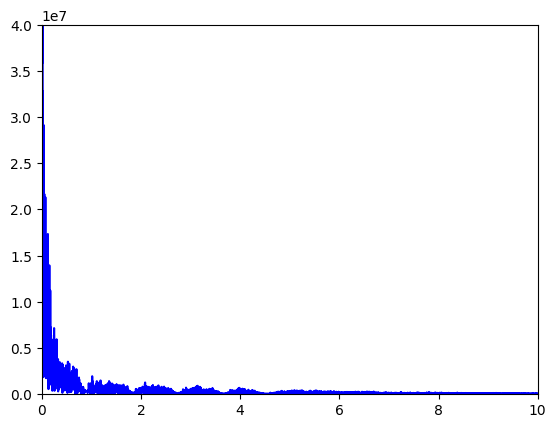

In [ ]:
# Add your solution here:
data = np.fft.fft(df_mnlp["i4_f"].dropna().to_numpy())
freq = np.fft.fftfreq(len(data), 1/sampling_rate)
on_real = len(freq)//2

plt.plot(freq[:on_real], np.abs(data[:on_real]),color = "b")
plt.ylim((0,4e+7))
plt.xlim((0,10))

### Plot the various steps of the spin filtering

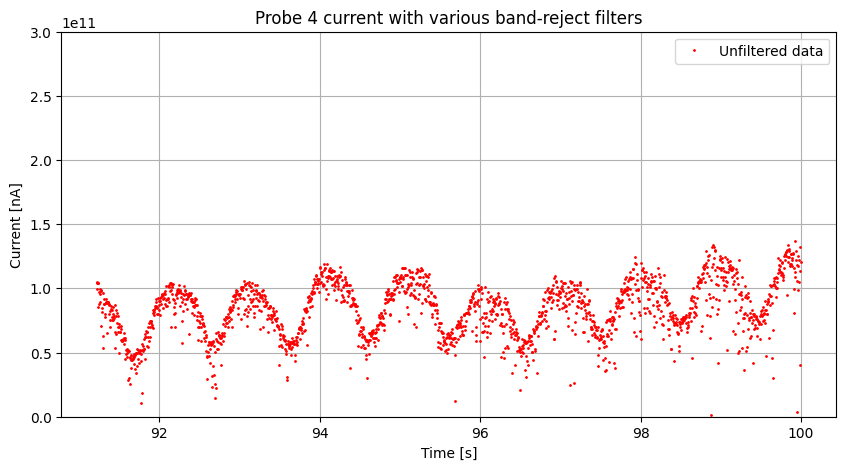

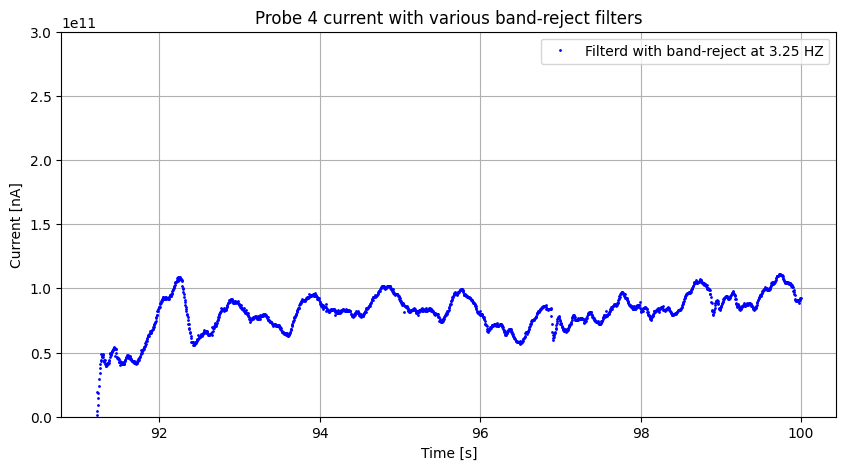

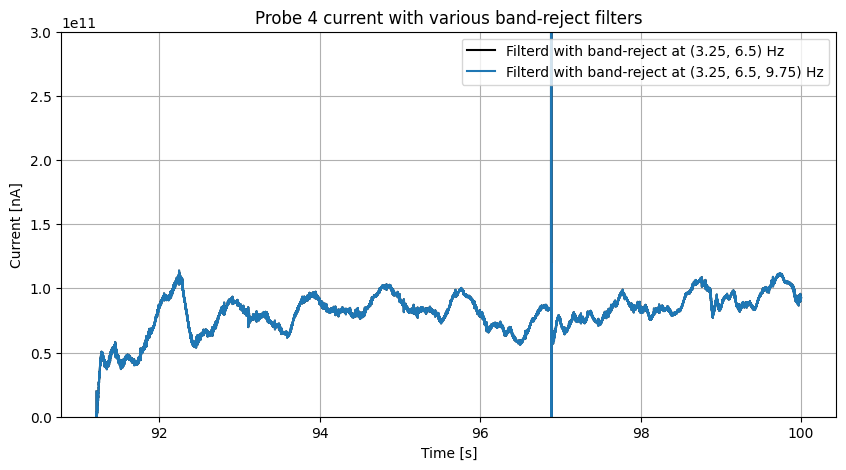

In [ ]:
# Plot the various steps of the spin filtering
# Reduce data to a subset for faster processing and to view the spin components
t_low = 0#280 #427
t_high = 100#330 #435
y_lim_low = 0
y_lim_high = 3e11
#Returns a table with false or true for each row according to if condition is met or not.
time_filter = ( df_mnlp['time'] >= t_low) & ( df_mnlp['time'] < t_high)

label1 = "Unfiltered data"
label2 = "Filterd with band-reject at 3.25 HZ"
label3 = "Filterd with band-reject at (3.25, 6.5) Hz"
label4 = "Filterd with band-reject at (3.25, 6.5, 9.75) Hz"


plt.figure(figsize=(10,5))
plt.plot(df_mnlp[time_filter].time, df_mnlp.i4[time_filter]*1e9,label=label1,color='red',marker='.',linestyle='None',markersize=2,markevery=15)
#plt.plot(df_mnlp[time_filter].time, p4_temp[time_filter]*1e9,label=label2, color='blue',marker='.',linestyle='None',markersize=2,markevery=15)
#plt.plot(df_mnlp[time_filter].time, p4_temp2[time_filter]*1e9,label=label3, color='black')
#plt.plot(df_mnlp[time_filter].time, df_mnlp.i4_f[time_filter]*1e9,label=label4)
plt.legend(loc='upper right')
plt.title("Probe 4 current with various band-reject filters")
plt.ylabel("Current [nA]")
plt.xlabel("Time [s]")
plt.ylim(y_lim_low,y_lim_high)
plt.grid()


plt.figure(figsize=(10,5))
#plt.plot(df_mnlp[time_filter].time, df_mnlp.i4[time_filter]*1e9,label=label1,color='red',marker='.',linestyle='None',markersize=2,markevery=15)
plt.plot(df_mnlp[time_filter].time, p4_filter[time_filter]*1e9,label=label2, color='blue',marker='.',linestyle='None',markersize=2,markevery=15)
#plt.plot(df_mnlp[time_filter].time, p4_temp2[time_filter]*1e9,label=label3, color='black')
#plt.plot(df_mnlp[time_filter].time, df_mnlp.i4_f[time_filter]*1e9,label=label4)
plt.legend(loc='upper right')
plt.title("Probe 4 current with various band-reject filters")
plt.ylabel("Current [nA]")
plt.xlabel("Time [s]")
plt.ylim(y_lim_low,y_lim_high)
plt.grid()


plt.figure(figsize=(10,5))
#plt.plot(df_mnlp[time_filter].time, df_mnlp.i4[time_filter]*1e9,label=label1,color='red',marker='.',linestyle='None',markersize=2,markevery=15)
#plt.plot(df_mnlp[time_filter].time, p4_temp[time_filter]*1e9,label=label2, color='blue',marker='.',linestyle='None',markersize=2,markevery=15)
plt.plot(df_mnlp[time_filter].time, p4_filter[time_filter]*1e9,label=label3, color='black')
plt.plot(df_mnlp[time_filter].time, df_mnlp.i4_f[time_filter]*1e9,label=label4)
plt.legend(loc='upper right')
plt.title("Probe 4 current with various band-reject filters")
plt.ylabel("Current [nA]")
plt.xlabel("Time [s]")
plt.ylim(y_lim_low,y_lim_high)
plt.grid()

#ax = plt.plot(df_mnlp[time_filter].time,df_mnlp.p4[time_filter])
#ax = plt.plot(df_mnlp[time_filter].time,df_mnlp.p4[time_filter])
#ax = plt.plot(df_mnlp[time_filter].time,df_mnlp.p4[time_filter])
#ax = plt.plot(p4_temp[time_fixlter])
#ax = plt.plot(p4_temp2[time_filter])
#ax = plt.plot(p4_filter[time_filter])

After removing the spin components the plot above reveals smaller structures in the trailing / gradient part of a enhanced density structure.

### Plot the complete filtered data

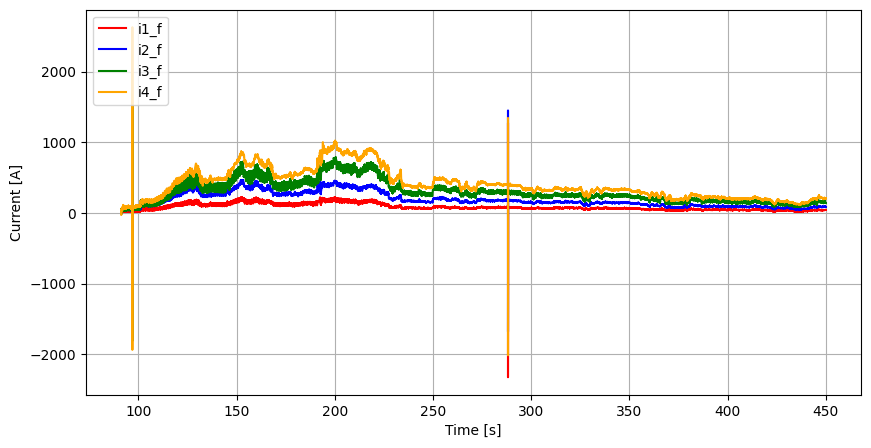

In [ ]:


colors =['red','blue','green','orange']
y_columns = ['i1_f','i2_f','i3_f','i4_f']

# Reduce data to a subset for faster processing
t_low = 50
t_high = 450

#Returns a table with false or true for each row according to if condition is met or not.
time_filter = ( df_mnlp['time'] >= t_low) & ( df_mnlp['time'] < t_high)

ax = df_mnlp[time_filter].plot(x='time', y=y_columns,kind='line',color=colors,figsize=(10,5))


ax.set_xlabel("Time [s]");
ax.set_ylabel("Current [A]");
plt.legend(loc='upper left')
plt.grid()


# 4. Calculate the electron density and plot the density curve

 - The polyfit in numpy works best for data within a column.
 - The four m-NLP data which should be fitted is however listed in separete columns.
 - The trick is to tranpose the dataframe so that columns become rows and rows become columns. In this way, the fit can be made with a column, and the execution time will be significantly faster.




In [ ]:
# Linear fitting to calcuate electron density

# Square the currents adding four new columns
df_mnlp[['i1_f_pow','i2_f_pow','i3_f_pow','i4_f_pow']] = df_mnlp[['i1_f','i2_f','i3_f','i4_f']].pow(2)

# Reduce data to a relevent time period.
t_low = 100
t_high = 450

#Returns a table with false or true for each row according to if condition is met or not.
idx_filter = ( df_mnlp['time'] >= t_low) & ( df_mnlp['time'] < t_high)

# Extract relevant time period
df_reduced = df_mnlp[idx_filter]

# Transpose the columns containing the squared currents
temp = df_mnlp[['i1_f_pow','i2_f_pow','i3_f_pow','i4_f_pow']].T

# Fit a straight line to the four measured points for the four given bias voltages using the inbuilt polyfit function.
fit_coef = np.polyfit(Vbias,temp,1)

#transpose the returned fit coefficients and add them to the dataframe
fit_coef = fit_coef.T
a = fit_coef[:,0]
b = fit_coef[:,1]
df_mnlp['a']= a
df_mnlp['b']= b


# Add a column with the electon density
df_mnlp['Ne'] = df_mnlp['a'].apply(calc_Ne)

df_mnlp.head()


<ipython-input-3-a87d8d5daeb6>:30: RuntimeWarning: invalid value encountered in sqrt
  res = np.sqrt(coef_a* ( sc.m_e/(2*sc.e*(sc.e*2*rp*lp)**2)))


,i1,i2,i3,i4,Frame Data,time,i1_f,i2_f,i3_f,i4_f,i1_f_pow,i2_f_pow,i3_f_pow,i4_f_pow,a,b,Ne
0,14.984170,38.022814,75.119179,103.963613,3063491.0,91.218438,2.812115,7.135833,14.097797,19.640319,7.907992,50.920109,198.747875,385.742123,85.422011,-287.636031,3.814245e+18
1,14.742490,37.529011,74.396880,101.797704,3063492.0,91.218750,-4.105621,-10.395725,-20.490620,-28.215417,16.856126,108.071101,419.865501,796.109756,176.637019,-592.118731,5.484848e+18
2,14.500810,34.566194,72.952280,99.872452,3063493.0,91.219063,1.370029,3.003175,6.691964,10.114302,1.876979,9.019060,44.782386,102.299103,22.468646,-78.466012,1.956195e+18
3,14.259129,26.171547,71.507680,97.465887,3063494.0,91.219375,0.294535,-0.065538,1.540061,2.438891,0.086751,0.004295,2.371789,5.948189,1.330121,-4.880377,4.759587e+17
4,13.534089,31.356476,68.859248,93.374726,3063495.0,91.219688,-0.450334,2.074829,-2.020701,-2.333850,0.202801,4.304916,4.083233,5.446854,1.034032,-1.919216,4.196533e+17


3200


<ipython-input-92-15edf86efc79>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sec[time_filter].plot(x='time', y='Ne',kind='line',lw=1,color='blue',figsize=(10,5), ax=ax, label="$N_e$ at 1 Hz")


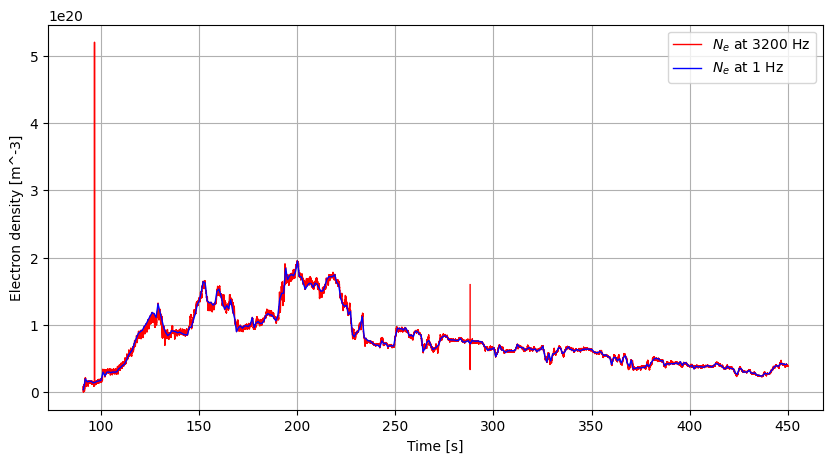

In [ ]:
# Plot the electron density
# Reduce data to a subset for faster processing
t_low = 0#428,138.66
t_high = 450#435 138.8

#Returns a table with false or true for each row according to if condition is met or not.
time_filter = ( df_mnlp['time'] >= t_low) & ( df_mnlp['time'] < t_high)

# For comparison show data if a measurement was performed at a second rate rather then kHz.

every_nth_sample = int(sampling_rate)
print(every_nth_sample)

df_sec = df_mnlp.iloc[0::every_nth_sample]

ax = df_mnlp[time_filter].plot(x='time', y='Ne',kind='line',lw=1,color='red',figsize=(10,5),label="$N_e$ at 3200 Hz")
df_sec[time_filter].plot(x='time', y='Ne',kind='line',lw=1,color='blue',figsize=(10,5), ax=ax, label="$N_e$ at 1 Hz")

ax.set_xlabel("Time [s]");
ax.set_ylabel("Electron density [m^-3]");

plt.grid()

# We can cleary see how the smalle structures would not be visible without a high sampling rate.


Compare the result with the plot in A. Spicher et al. "Direct evidence of double-slope power spectra in the high-latitude ionospheric plasma", Geophysical research letters, 2014.

https://doi.org/10.1002/2014GL059214